In [1]:
import pandas as pd

In [101]:
data=pd.read_csv("malicious_dataset.csv")

In [102]:
data.columns

Index(['frame_info.encap_type', 'frame_info.time', 'frame_info.time_epoch',
       'frame_info.number', 'frame_info.len', 'frame_info.cap_len', 'eth.type',
       'ip.version', 'ip.hdr_len', 'ip.tos', 'ip.id', 'ip.flags',
       'ip.flags.rb', 'ip.flags.df', 'ip.flags.mf', 'ip.frag_offset', 'ip.ttl',
       'ip.proto', 'ip.checksum', 'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len',
       'tcp.hdr_len', 'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn',
       'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg',
       'tcp.flags.cwr', 'tcp.window_size', 'tcp.checksum',
       'tcp.urgent_pointer', 'tcp.options.mss_val', 'label'],
      dtype='object')

In [103]:
data.isnull().sum()

frame_info.encap_type         0
frame_info.time               0
frame_info.time_epoch         0
frame_info.number             0
frame_info.len                0
frame_info.cap_len            0
eth.type                      0
ip.version                    0
ip.hdr_len                    0
ip.tos                   193315
ip.id                         0
ip.flags                      0
ip.flags.rb                   0
ip.flags.df                   0
ip.flags.mf                   0
ip.frag_offset                0
ip.ttl                        0
ip.proto                      0
ip.checksum                   0
ip.src                        0
ip.dst                        0
ip.len                        0
ip.dsfield                    0
tcp.srcport                   0
tcp.dstport                   0
tcp.seq                       0
tcp.ack                       0
tcp.len                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.fin                 0
tcp.flag

In [104]:
drop=['ip.tos','tcp.options.mss_val',"frame_info.time","eth.type","eth.type","ip.id","frame_info.time"]
data=data.drop(drop,axis=1)

In [105]:
#converting hex to integer
data["ip.checksum"]=data["ip.checksum"].apply(lambda x: int(x, 16))
data["tcp.checksum"]=data["tcp.checksum"].apply(lambda x: int(x, 16))

In [106]:
data.dtypes # drop eth.type,ip.id
            #encode ip.flags,ip.src,ip.dst,ip.dsfield,tcp.flags

frame_info.encap_type      int64
frame_info.time_epoch    float64
frame_info.number          int64
frame_info.len             int64
frame_info.cap_len         int64
ip.version                 int64
ip.hdr_len                 int64
ip.flags                  object
ip.flags.rb                int64
ip.flags.df                int64
ip.flags.mf                int64
ip.frag_offset             int64
ip.ttl                     int64
ip.proto                   int64
ip.checksum                int64
ip.src                    object
ip.dst                    object
ip.len                     int64
ip.dsfield                object
tcp.srcport                int64
tcp.dstport                int64
tcp.seq                    int64
tcp.ack                    int64
tcp.len                    int64
tcp.hdr_len                int64
tcp.flags                 object
tcp.flags.fin              int64
tcp.flags.syn              int64
tcp.flags.reset            int64
tcp.flags.push             int64
tcp.flags.

In [107]:
to_encode=["ip.flags","ip.src","ip.dst","ip.dsfield","tcp.flags"]

for col in to_encode:
    
    data[col]=data[col].astype('category')
    data[col] = data[col].cat.codes

In [108]:
data.dtypes

frame_info.encap_type      int64
frame_info.time_epoch    float64
frame_info.number          int64
frame_info.len             int64
frame_info.cap_len         int64
ip.version                 int64
ip.hdr_len                 int64
ip.flags                    int8
ip.flags.rb                int64
ip.flags.df                int64
ip.flags.mf                int64
ip.frag_offset             int64
ip.ttl                     int64
ip.proto                   int64
ip.checksum                int64
ip.src                      int8
ip.dst                      int8
ip.len                     int64
ip.dsfield                  int8
tcp.srcport                int64
tcp.dstport                int64
tcp.seq                    int64
tcp.ack                    int64
tcp.len                    int64
tcp.hdr_len                int64
tcp.flags                   int8
tcp.flags.fin              int64
tcp.flags.syn              int64
tcp.flags.reset            int64
tcp.flags.push             int64
tcp.flags.

In [109]:
label=data["label"]
X=data.drop("label",axis=1)

# 'frame_info.time_epoch', 

In [89]:
#normalising the data
# to_norm=[
#        'frame_info.len', 'frame_info.cap_len',
#        'ip.flags','ip.flags.df',
#         'ip.ttl', 'ip.checksum', 'ip.src',
#        'ip.dst', 'ip.len', 'ip.dsfield', 'tcp.srcport', 'tcp.dstport',
#        'tcp.seq', 'tcp.ack', 'tcp.hdr_len', 'tcp.flags',
#        'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
#        'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr', 'tcp.window_size',
#        'tcp.checksum']

# X[to_norm] = X[to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# # for col in to_norm:
# #     print(col)
#     X[col] = X[col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  77.13%  
              Classification_report 
               precision    recall  f1-score   support

    hping_ack       1.00      1.00      1.00       431
    hping_fin       1.00      1.00      1.00       388
   hping_null       0.87      0.70      0.78       680
    hping_syn       0.99      0.99      0.99      3672
   hping_xmas       1.00      0.99      1.00       375
      masscan       0.93      0.92      0.93      2059
     nmap_ack       0.35      0.74      0.48      1159
 nmap_connect       0.72      0.72      0.72      4608
     nmap_fin       0.48      0.58      0.53      1307
  nmap_maimon       0.88      0.74      0.80      1129
    nmap_null       0.97      0.72      0.83      1099
     nmap_syn       0.71      0.70      0.70      4212
  nmap_window       0.74      0.57      0.64      1404
    nmap_xmas       1.00      0.72      0.84    

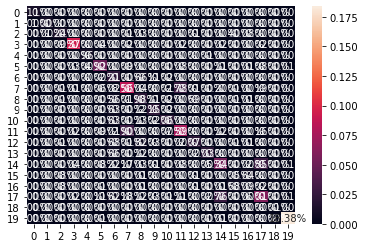

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  49.11%  
              Classification_report 


/Users/fr/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fr/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fr/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

    hping_ack       1.00      1.00      1.00       431
    hping_fin       0.26      0.37      0.31       388
   hping_null       0.12      0.20      0.15       680
    hping_syn       0.34      0.49      0.40      3672
   hping_xmas       0.26      0.19      0.22       375
      masscan       0.49      0.41      0.45      2059
     nmap_ack       0.36      0.75      0.49      1159
 nmap_connect       0.38      0.40      0.39      4608
     nmap_fin       0.46      0.55      0.50      1307
  nmap_maimon       0.80      0.73      0.77      1129
    nmap_null       0.91      0.72      0.81      1099
     nmap_syn       0.39      0.33      0.36      4212
  nmap_window       0.76      0.55      0.64      1404
    nmap_xmas       0.92      0.72      0.81      1087
 unicorn_conn       0.37      0.23      0.28      3416
unicorn_fxmas       0.00      0.00      0.00       307
 unicorn_null       0.01      0.00      0.00       349
  unicorn

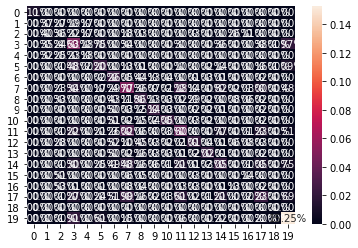

###################- End -###################


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=2)

models = [DecisionTreeClassifier,KNeighborsClassifier]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')